## Introduction to PyTorch


* Pytorch Tensor understanding
* Loading Datasets and DataLoaders in PyTorch
* Using Transforms of PyTorch and visualization
* Creating a model and building
* Understanding the automatic differentiation
* Optimising model parameters
* Saving and loading the model

## Pytorch Tensor 

* Introdcution to Tensors
* Creating Tensors
* Getting information from tensors
* Manipulating Tensors
* Dealing with tensors shapes
* Indexing on tensors
* Mixing Pytorch tensors and Numpy
* Reproducibility
* Running tensors on GPU


Importing torch

In [205]:
import torch
print(torch.__version__)

2.3.0+cpu


Tensors can be understood as data similar to Numpy Array.  
Tensor is a multi-dimensional matrix containing elements of a single data type.


Similar to numpy datatypes like np.int , np.uint8 and so on. We have datatypes for tensor as well.

| Datatype      | Description                                                                                         |
|---------------|-----------------------------------------------------------------------------------------------------|
| `float32`     | 32-bit floating point. Widely used for neural network weights and activations.                      |
| `float64`     | 64-bit floating point. Offers higher precision than `float32` but uses more memory.                 |
| `int32`       | 32-bit integer. Commonly used for indexing and integer operations.                                  |
| `int64`       | 64-bit integer. Used when higher range for integers is needed.                                       |
| `uint8`       | 8-bit unsigned integer. Often used for image data.                                                  |
| `bool`        | Boolean datatype. Used for binary operations and masks.                                             |
| `complex64`   | 64-bit complex number. Each complex number has two 32-bit floats for real and imaginary parts.      |
| `complex128`  | 128-bit complex number. Each complex number has two 64-bit floats for real and imaginary parts.     |
| `float16`     | 16-bit floating point. Used to reduce memory bandwidth, commonly in GPUs.                          |
| `bfloat16`    | 16-bit brain floating point. Similar to `float16`, used for efficient training of deep learning models. |



### Creating Tensors

**Creating Scalar**  
When we return the scalar and see that it is not just a regular number but a scalar.

In [206]:
scalar  = torch.tensor(7)
scalar

tensor(7)

Checking the dimension shape and size of the scalar

In [207]:
print("the shape is {}".format(scalar.shape))
print("the size is {}".format(scalar.size()))
print("the number of dimension is {}".format(scalar.ndim))
print("the datatype is {}".format(scalar.dtype))

the shape is torch.Size([])
the size is torch.Size([])
the number of dimension is 0
the datatype is torch.int64


Creating Vector

In [208]:
vector = torch.tensor([1,2,3])
vector

tensor([1, 2, 3])

In [209]:
print("the shape of vector is {}".format(vector.shape))
print("the size of vector is {}".format(vector.size()))
print("the number of dimension of vector is {}".format(vector.ndim))
print("the datatype of vector is {}".format(vector.dtype))

the shape of vector is torch.Size([3])
the size of vector is torch.Size([3])
the number of dimension of vector is 1
the datatype of vector is torch.int64


Creating MATRIX

In [210]:
MY_MATRIX  = torch.tensor([[1,2,3],[4,5,6]])

In [211]:
print("the shape of MY_MATRIX is {}".format(MY_MATRIX.shape))
print("the size of MY_MATRIX is {}".format(MY_MATRIX.size()))
print("the number of dimension of MY_MATRIX is {}".format(MY_MATRIX.ndim))
print("the datatype of MY_MATRIX is {}".format(MY_MATRIX.dtype))

the shape of MY_MATRIX is torch.Size([2, 3])
the size of MY_MATRIX is torch.Size([2, 3])
the number of dimension of MY_MATRIX is 2
the datatype of MY_MATRIX is torch.int64


Creating Tensors

In [212]:
MY_TENSOR  = torch.tensor([[[1,2,3],[4,5,6],[7,8,9]]])

MY_TENSOR

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])

In [213]:
print("the shape of MY_TENSOR is {}".format(MY_TENSOR.shape))
print("the size of MY_TENSOR is {}".format(MY_TENSOR.size()))
print("the number of dimension of MY_TENSOR is {}".format(MY_TENSOR.ndim))
print("the datatype of MY_TENSOR is {}".format(MY_TENSOR.dtype))

the shape of MY_TENSOR is torch.Size([1, 3, 3])
the size of MY_TENSOR is torch.Size([1, 3, 3])
the number of dimension of MY_TENSOR is 3
the datatype of MY_TENSOR is torch.int64


![tensor_dimension](./images/tensor_dimension.png)

Usually `scalar` and ` vector` are written in small letter and `MATRIX` and `TENSOR` are written in capital letter.

![tensor_data](./images/torch_data.jpg)

### Creating Random Tensors

In [214]:
random_tensor = torch.rand(size = (1,3,4))
random_tensor , random_tensor.dtype

(tensor([[[0.0149, 0.6417, 0.7417, 0.0225],
          [0.0724, 0.3692, 0.4785, 0.8048],
          [0.3059, 0.2675, 0.6245, 0.3675]]]),
 torch.float32)

Thus the default datatype for the tensor is float32

Creating zeros and ones tensor

In below code if we want to create for one we use
* torch.ones()
* torch.ones_like()

In [215]:
random_zero = torch.zeros(size = (1,3,4))
similar_zero = torch.zeros_like(random_tensor)
print(random_tensor)
print(similar_zero)

tensor([[[0.0149, 0.6417, 0.7417, 0.0225],
         [0.0724, 0.3692, 0.4785, 0.8048],
         [0.3059, 0.2675, 0.6245, 0.3675]]])
tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


### Creating tensor of a range

In [216]:
range_tensor = torch.arange(1,10,0.5)
range_tensor

tensor([1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000, 4.5000, 5.0000,
        5.5000, 6.0000, 6.5000, 7.0000, 7.5000, 8.0000, 8.5000, 9.0000, 9.5000])

torch.tensor parameters

* `dtype` specifies the default datatypes for creating the tensor
* `device` specifies where the tensor  is created for,` CPU` or `GPU`
* `requires_grad` specifies if any operation performed on this tensor should be recorded or not.


So, when doing tensor calculations all the tensor should be present on the same dataypes and their shape should match. In case of different datatypes the datatypes can be converted to other type during operation.

In [217]:
tensor_1 = torch.arange(1,10 ,dtype= torch.float16)
tensor_2 = torch.arange(1,10 ,dtype= torch.int)
print(tensor_1 * tensor_2)

tensor([ 1.,  4.,  9., 16., 25., 36., 49., 64., 81.], dtype=torch.float16)


We can see the tensor_2 with `torch.int` datatype has been converted to `torch.float16` during the operation.

### Tensor Manipulation

All the operation done here is similar to Numpy.

Some of the operation are :

* Addition
* Subtraction
* Multiplication ( element wise)
* Division
* Matrix Multiplication


**Matrix operation**

When doing matrix multiplication we got an error saying that two tensor datatypes must match

```python
print( tensor_1 @ tensor_2)
```

RuntimeError: dot : expected both vectors to have same dtype, but found Half and Int

Lets create tensors of same datatypes


In [218]:
tensor_1 = torch.arange(1,10,dtype= torch.float16)
tensor_2 = torch.rand(size = (1,9) , dtype= torch.float16 )

tensor_1.shape , tensor_2.shape
                        

(torch.Size([9]), torch.Size([1, 9]))

If we look at the shape above one is of size [9] and other is of size[1,9]

Lets add extra dimension on the tensor 1 to make it suitable for element wise multiplication with tensor 2

In [219]:
tensor_1 = tensor_1.unsqueeze(0)
tensor_1.shape

torch.Size([1, 9])

We added an extra dimension, so now we can do element wise matrix multiplication

In [220]:
tensor_3 = tensor_1 @ tensor_2.T
print(tensor_3)

tensor([[29.5781]], dtype=torch.float16)


we did matrix multiplication of 1,9 and 9,1 so our obtained result was only 1

matrix multiplication can be visualized from this animation.

![mat_mul](./images/mat_mul.gif)



### Element wise multiplication

In [221]:
print(tensor_1 * tensor_2)

tensor([[0.1318, 0.3545, 2.8203, 3.4727, 4.4609, 4.5352, 0.5195, 5.1406, 8.1484]],
       dtype=torch.float16)


### Min, Max, Sum, Mean ( Aggregation)

In [222]:
random_tensor = torch.rand(size = (2,2))
random_tensor

tensor([[0.6412, 0.9325],
        [0.7639, 0.3909]])

In [223]:
print(f"Minimum: {random_tensor.min()}")
print(f"Maximum: {random_tensor.max()}")
print(f"Mean: {random_tensor.mean()}") 
print(f"Sum: {random_tensor.sum()}")

Minimum: 0.39085549116134644
Maximum: 0.932500958442688
Mean: 0.6821336150169373
Sum: 2.728534460067749


Get the index of min and max element

In [224]:
random_tensor = torch.rand(size = (1,2,2))
random_tensor

tensor([[[0.7992, 0.5631],
         [0.2071, 0.9525]]])

In [225]:
print(' Max index  :  {}'.format(torch.argmax(random_tensor)))
print(' Min index  :  {}'.format(torch.argmin(random_tensor)))

 Max index  :  3
 Min index  :  2


### Changing tensor datatypes

In [226]:
random_tensor = torch.rand(size = (2,3,3))
print(random_tensor.dtype)
print(random_tensor)

torch.float32
tensor([[[0.8036, 0.8263, 0.2026],
         [0.8496, 0.0121, 0.6435],
         [0.6814, 0.2488, 0.6751]],

        [[0.1543, 0.0226, 0.7537],
         [0.7958, 0.4441, 0.0572],
         [0.0841, 0.5091, 0.9720]]])


In [227]:
changed_random = random_tensor.type(torch.int8)
print(changed_random.dtype)
print(changed_random)

torch.int8
tensor([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=torch.int8)


### Shape Manipulation

| Method                      | One-line description                                                                                   |
|-----------------------------|-------------------------------------------------------------------------------------------------------|
| `torch.reshape(input, shape)` | Reshapes input to shape (if compatible), can also use `torch.Tensor.reshape()`.                        |
| `Tensor.view(shape)`         | Returns a view of the original tensor in a different shape but shares the same data as the original tensor. |
| `torch.stack(tensors, dim=0)` | Concatenates a sequence of tensors along a new dimension (`dim`), all tensors must be same size.       |
| `torch.squeeze(input)`       | Squeezes input to remove all the dimensions with value 1.                                             |
| `torch.unsqueeze(input, dim)` | Returns input with a dimension value of 1 added at `dim`.                                             |
| `torch.permute(input, dims)` | Returns a view of the original input with its dimensions permuted (rearranged) to `dims`.              |


#### Reshaping

In [228]:
original_tensor = torch.rand(size = (2,5))
print("The original tensor is : ")
print(original_tensor)
reshaped_tensor = original_tensor.reshape(1,10)
print("The reshaped tensor is : ")
print(reshaped_tensor)

The original tensor is : 
tensor([[0.6852, 0.5569, 0.1607, 0.5117, 0.2165],
        [0.4890, 0.0346, 0.2188, 0.3473, 0.0351]])
The reshaped tensor is : 
tensor([[0.6852, 0.5569, 0.1607, 0.5117, 0.2165, 0.4890, 0.0346, 0.2188, 0.3473,
         0.0351]])


### Squeeze

this removes the dimension with value 1

For example , lets create a tensor of shape (1,2,2) then when we do squeeze we get the shape only (2,2) 

In [229]:
org_tensor = torch.rand(size= (1,2,2))
print(org_tensor.shape)
squeezed_tensor = org_tensor.squeeze()
print(squeezed_tensor.shape)

torch.Size([1, 2, 2])
torch.Size([2, 2])


### Unsqueeze

this adds extra dimension
Lets increase the dimension of the previously squeezed tensor

In [230]:
unsqueezed_tensor = squeezed_tensor.unsqueeze(0)
# we are adding extra dimenison in the 0th index
print(unsqueezed_tensor.shape)

torch.Size([1, 2, 2])


The squeeze and unsqueeze operation can be viewed from this image

![squeeze_unsqueeze](./images/squeeze_unsqueeze.png)

### Indexing ( selecting data from tensors )


In [231]:
random_tensor = torch.rand( size= (2,3,3))
random_tensor

tensor([[[0.6382, 0.9186, 0.8303],
         [0.6624, 0.6489, 0.2965],
         [0.0218, 0.4689, 0.2544]],

        [[0.8418, 0.4448, 0.3435],
         [0.4243, 0.2063, 0.1817],
         [0.6568, 0.8159, 0.5948]]])

lets get the first columns of each matrix

In [232]:
random_tensor[:,:,0]

tensor([[0.6382, 0.6624, 0.0218],
        [0.8418, 0.4243, 0.6568]])

Lets get the first row of each matrix

In [233]:
random_tensor[ : , 0 , :]

tensor([[0.6382, 0.9186, 0.8303],
        [0.8418, 0.4448, 0.3435]])

`torch.view()`

It keeps the data as original but changes the view i.e changes the dimension when displaying.

The view doesn't return the copy. It is linked to the original data, so any changes in the view data will br reflected in the original

In [234]:
my_tensor = torch.zeros((2,3))
my_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [235]:
view_tensor =  my_tensor.view(1,6)
view_tensor

tensor([[0., 0., 0., 0., 0., 0.]])

Lets change the view_tensor and see what happens to the original tensor

In [236]:
view_tensor[0,5] = 1
view_tensor

tensor([[0., 0., 0., 0., 0., 1.]])

In [237]:
my_tensor

tensor([[0., 0., 0.],
        [0., 0., 1.]])

So changes done in `view_tensor` is also seen in `my_tensor`

### Creating tensors from numpy

In [238]:
import numpy as np

array1 = np.random.rand(3,5)
array1

array([[0.92161495, 0.10025034, 0.70069907, 0.08066198, 0.45905316],
       [0.2365478 , 0.89373517, 0.80907389, 0.89185386, 0.0930916 ],
       [0.62981711, 0.74420844, 0.06250636, 0.36513678, 0.45218504]])

In [239]:
tensor1 = torch.tensor(array1)
tensor1

tensor([[0.9216, 0.1003, 0.7007, 0.0807, 0.4591],
        [0.2365, 0.8937, 0.8091, 0.8919, 0.0931],
        [0.6298, 0.7442, 0.0625, 0.3651, 0.4522]], dtype=torch.float64)

The tensor created has utilized the datatype from the numpy array

Sometimes we want to create random number and then use it reproduce result in such case we use 

`torch.manual_seed(seed = RANDOM_SEED)`

In [240]:
RANDOM_SEED = 199
torch.random.manual_seed(seed= RANDOM_SEED)
random_tensor = torch.rand(size = (5,5))
random_tensor

tensor([[0.6267, 0.1686, 0.4021, 0.7782, 0.3756],
        [0.0933, 0.1031, 0.7099, 0.7436, 0.2095],
        [0.4798, 0.6020, 0.5863, 0.6574, 0.9502],
        [0.9318, 0.1348, 0.8016, 0.8189, 0.2967],
        [0.6419, 0.5061, 0.5140, 0.3459, 0.5607]])

In [241]:
RANDOM_SEED = 199
torch.random.manual_seed(seed= RANDOM_SEED)
random_tensor = torch.rand(size = (5,5))
random_tensor

tensor([[0.6267, 0.1686, 0.4021, 0.7782, 0.3756],
        [0.0933, 0.1031, 0.7099, 0.7436, 0.2095],
        [0.4798, 0.6020, 0.5863, 0.6574, 0.9502],
        [0.9318, 0.1348, 0.8016, 0.8189, 0.2967],
        [0.6419, 0.5061, 0.5140, 0.3459, 0.5607]])

We are able to produce the same random tensor which will be useful in reproducing the result that we want in future

## Dataset and Dataset Loader

## Loading Dataset

In [242]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Lets understand the different parameters given to the loaddataset

`root` this is the path where our data will be downloaded to

`train` denotes we want to return train data or not. Meaning want to return test or train data

`download` the dataset loader checks the `root` path for the dataset, if its not available then downlaods from the internet

`transform`and `target_transform` specify the trasnformaiton that we want to apply to the label or features


### Visualizing the dataset

In [243]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

### Viewing a sample data

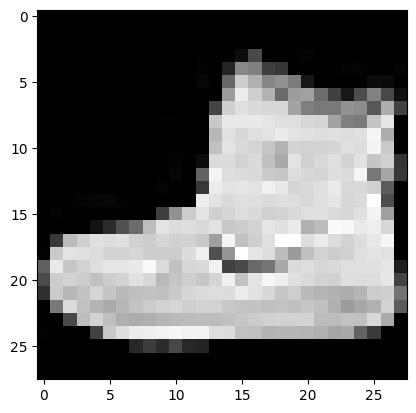

In [244]:
img,label = training_data[0] 
plt.imshow(img[0], cmap= "gray")
plt.show()

In [245]:
img,label = training_data[0]
img.shape

torch.Size([1, 28, 28])

`To remove the first dimension 1, we use squeeze and plot the image`

### Lets plot random iamges

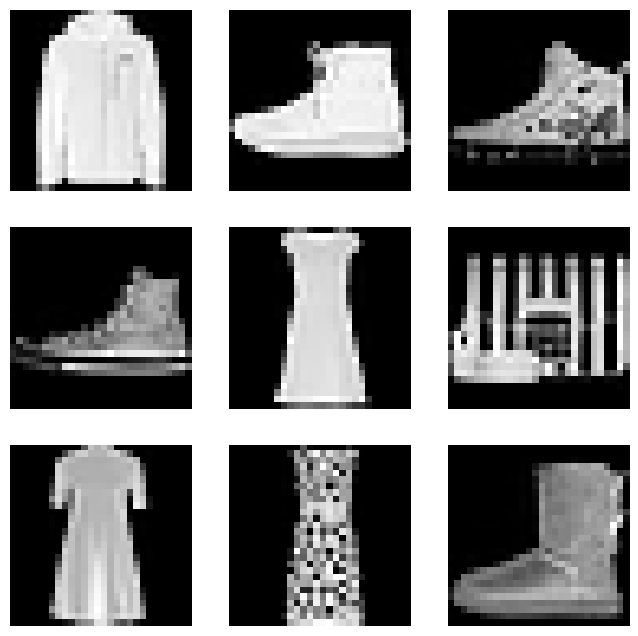

In [246]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray") 
plt.show()

### Creating a Custom Dataset for out files

lets analyze the training_data and its various methods

In [247]:
training_data.__dict__

{'root': 'data',
 'transform': ToTensor(),
 'target_transform': None,
 'transforms': StandardTransform
 Transform: ToTensor(),
 'train': True,
 'data': tensor([[[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0]],
 
         ...,
 
         [[0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          [0, 0, 0,  ..., 0, 0, 0],
          ...,
        

### Custom Dataset Class

Lets say we have a txt file that has image path and label of the image. such as shown below :

![custom_data](./images/custom_data.jpg)

There are two image data inside the `data` folder and thier label and image path name is contained in `data.txt`

**Data.txt**
> cat.jpg cat  
> dog.jpg dog

Lets create our own dataset class to deal with such data

In [248]:
import os
import pandas as pd
from torch.utils.data import Dataset
from torchvision.io import read_image
import torchvision.transforms as T

class my_dataset(Dataset):
    def __init__(self, data_file, transform=None, target_transform=None , width = 100 , height = 200):
        self.img_paths, self.img_labels = self.read_data(data_file)
        self.transform = transform
        self.target_transform = target_transform
        self.width = width
        self.height = height

    def read_data(self, txt_path):
        img_path_list = []
        img_label_list = []
        with open(txt_path, "r") as file:
            data = file.readlines()
            for line in data:
                word = line.split()
                img_path_list.append('custom_dataset/data/' + word[0])
                img_label_list.append(word[1])

        return img_path_list,img_label_list

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        image = read_image(img_path) 
        label = self.img_labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

lets check our class

In [249]:
image_dataset = my_dataset('custom_dataset/data.txt')
image, label = image_dataset.__getitem__(idx= 0)
image.shape

torch.Size([3, 736, 655])

We can see the shape is (3,736,635) lets permute the shape to (736,635,3)

In [250]:
image = torch.permute(image, (1,2,0))
image.shape

torch.Size([736, 655, 3])

Text(0.5, 1.0, 'cat')

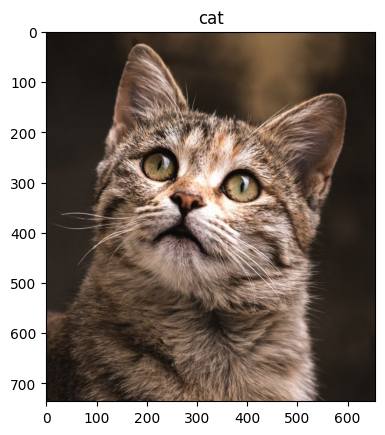

In [251]:
plt.imshow(image)
plt.title(label)

Instead of manually doing this we can pass the transform to the dataset class. So each image will be transformed before returning.

We will make the data loader return the same image size and perform torch.permute value

In [252]:
width, height = 500,500

my_transform = T.Compose([
    T.ToPILImage(),                # Convert tensor to PIL image
    T.Resize((height, width)),     # Resize the image
    T.ToTensor()                   # Convert PIL image back to tensor
])

In [253]:
image_dataset = my_dataset('custom_dataset/data.txt', transform= my_transform)
image, label = image_dataset.__getitem__(idx= 0)
image.shape

torch.Size([3, 500, 500])

### Data loaders

The dataset class that we created above returns our data one at a time. And during training we want to pass the dataset in minibatches with shuffling done every time we want the data.datasets
For this we use Dataloader

For this we will pass our own custom dataset to the loader. And we can get our data in batches through the loader and with our own transform applied to it.

In [254]:
from torch.utils.data import DataLoader
training_dataloader = DataLoader(image_dataset, batch_size= 2 , shuffle= True)


So to pass the dataset to the dataloader our
```python
class dataset()
```

must have three methods which are

* __init__  
This is the funciton which runs once we instantiate the Dataset object.

* __len__  
returns the length of the dataset

* __getitem__
This loads and returns the dataset of a given index.

In [255]:
first_batch = next(iter(training_dataloader))

Lets plot the first batch

We know we have given a batch size of 2 , so in each batch there will be 2 images along with their labels.

In [256]:
len(first_batch)

2

The above first_batch has length of `two`. One contains the image and another contains the label 

Text(0.5, 1.0, 'dog')

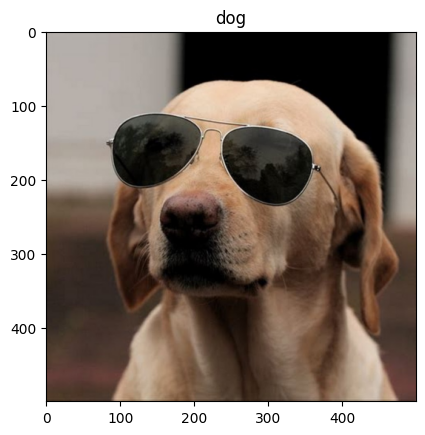

In [257]:
plt.imshow(torch.permute(first_batch[0][0], (1,2,0)))
plt.title(first_batch[1][0])       # image array

Text(0.5, 1.0, 'cat')

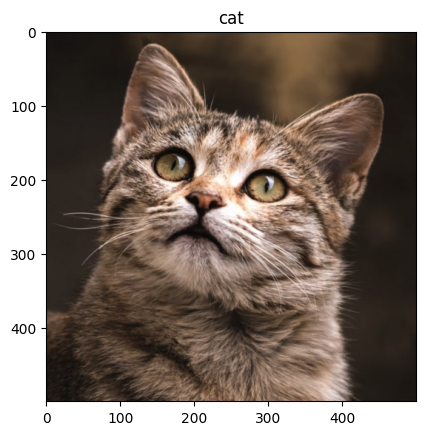

In [258]:
plt.imshow(torch.permute(first_batch[0][1], (1,2,0)))
plt.title(first_batch[1][1])       # image array

So we just created our own custom dataset and passed it to the dataloader

## Transforms

When creating out custom dataset , we had kept the `transform` and `target transform` . These two will be used to manipulate the data and their label. Since the data wont be availble in final processed form. It is better to pass the transform to the dataset than to hardcode the transform as it may differ from project to project.
So we use `torchvision.transforms`to tackle this problem.

When we load the fashion mnist dataset. Our image should be in tensor format. Initially the dataset is in PIL format. And if we wish to perform one hot encoding on the label then we can do it as follows


`ToTensor()`

ToTensor converts a PIL image or NumPy ndarray into a FloatTensor. and scales the image’s pixel intensity values in the range [0., 1.]


`Lambda Transforms`

Lambda transforms apply any user-defined lambda function.
It allows us to use the `lambda` function. We wanted to convert the labels to one hot encoded format. instead of creating a seperate function and mapping the whole datasets we can create a lambda function and perform the function inside.

So first we created a zeros of length 10 and then added 1 in the index given in the labels. 


In [259]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor,Lambda

In [260]:
fashion_dataset = datasets.FashionMNIST(
    root= "data",
    train= True,
    download = False,
    transform = ToTensor(),
    target_transform= Lambda(lambda y : torch.zeros(10,dtype = torch.float).scatter_(0,torch.tensor(y),value = 1) )
)

In [261]:
img,label = fashion_dataset.__getitem__(100)
print(img.type)
print(label)

<built-in method type of Tensor object at 0x7f2ce65a9530>
tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])


Thus with the help of transform we were able to modify the whole dataset without transforming all data and store it somewhere whcih would have been space consuming.

If we want to stack different transforms together then we can do it through `torchvision.transforms.compose`

For better and faster transform capability instead of just `torchvision.transforms` we can use `torchvision.transforms.v2`

The advantage of `v2` over `torchvision.transforms` are listed below :


    They can transform images but also bounding boxes, masks, or videos. This provides support for tasks beyond image classification: detection, segmentation, video classification, etc.

    They support more transforms like CutMix and MixUp. 

    They’re faster.

    They support arbitrary input structures (dicts, lists, tuples, etc.).

    Future improvements and features will be added to the v2 transforms only.


Text(0.5, 1.0, 'cat')

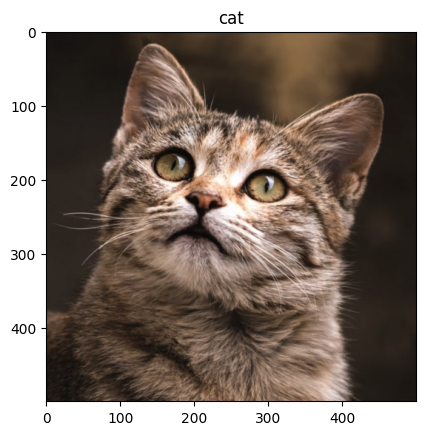

In [262]:
from torchvision import transforms as v2 

# Define the transformations using torchvision's Compose
transform = v2.Compose([
    v2.ToPILImage(),               # Convert tensor to PIL image
    v2.Resize((height, width)),    # Resize the image
    v2.ToTensor(),                 # Convert PIL image to tensor
    v2.Lambda(lambda x: x.permute(1, 2, 0))  # Permute the dimensions
])

# Assuming my_dataset and my_transform are defined elsewhere
image_dataset = my_dataset('custom_dataset/data.txt', transform=transform)
image, label = image_dataset.__getitem__(idx=0)
plt.imshow(image)
plt.title(label)
